In [14]:
#Extracting Tesla Stock Data Using yfinance

In [ ]:
pip install yfinance

In [5]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for Tesla
ticker_symbol = "TSLA"

# Create a Ticker object
tesla = yf.Ticker(ticker_symbol)

# Define the period or date range you want data for
# Example: last 5 years of daily data
data = tesla.history(period="5y")

# Display the first few rows of the data
print(data.head())

                                Open       High        Low      Close  \
Date                                                                    
2019-11-11 00:00:00-05:00  22.930000  23.279333  22.799999  23.006001   
2019-11-12 00:00:00-05:00  23.126667  23.358000  22.936001  23.328667   
2019-11-13 00:00:00-05:00  23.666668  23.755333  23.011999  23.073999   
2019-11-14 00:00:00-05:00  23.073999  23.589333  22.860666  23.290001   
2019-11-15 00:00:00-05:00  23.375999  23.520000  23.224001  23.478001   

                              Volume  Dividends  Stock Splits  
Date                                                           
2019-11-11 00:00:00-05:00  149800500        0.0           0.0  
2019-11-12 00:00:00-05:00  110391000        0.0           0.0  
2019-11-13 00:00:00-05:00  126301500        0.0           0.0  
2019-11-14 00:00:00-05:00   96973500        0.0           0.0  
2019-11-15 00:00:00-05:00   72135000        0.0           0.0  


In [8]:
data.to_csv("tesla_stock_data.csv")

Matplotlib is building the font cache; this may take a moment.


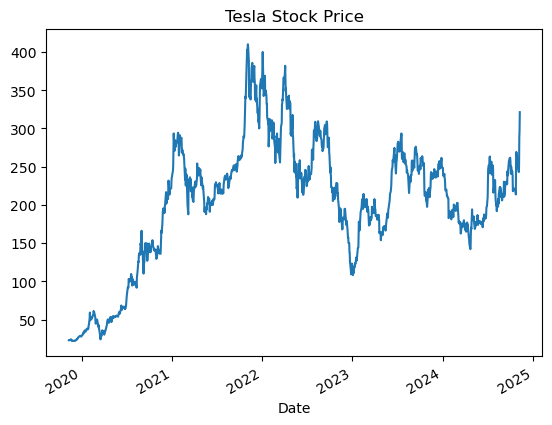

In [10]:
import matplotlib.pyplot as plt

# Plot the closing prices
data['Close'].plot(title="Tesla Stock Price")
plt.show()

In [12]:
#Extracting Tesla Revenue Data Using Webscraping#

In [ ]:
pip install requests beautifulsoup4 pandas

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of Yahoo Finance's Tesla Financials page
url = 'https://finance.yahoo.com/quote/TSLA/financials'

# Set up headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36"
}

# Send a GET request to the webpage
response = requests.get(url, headers=headers)
response.raise_for_status()  # Check for request errors

# Parse the webpage content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the script tag containing financial data
script_data = None
for script in soup.find_all('script'):
    if 'root.App.main' in script.text:
        script_data = script.text
        break

# Extract JSON data from the script
import json
import re

json_str = re.search(r'root.App.main\s*=\s*(\{.*\})', script_data).group(1)
data = json.loads(json_str)

# Navigate through the JSON to find the financial data
financial_data = data['context']['dispatcher']['stores']['QuoteSummaryStore']['incomeStatementHistory']['incomeStatementHistory']

# Extract revenue data
revenue_data = []
for entry in financial_data:
    date = entry['endDate']['fmt']
    revenue = entry['totalRevenue']['raw']
    revenue_data.append({'Date': date, 'Revenue': revenue})

# Create a DataFrame
df = pd.DataFrame(revenue_data)

# Display the DataFrame
print(df)

In [3]:
#3

In [ ]:
pip install yfinance

                             Open    High     Low  Close    Volume  Dividends  \
Date                                                                            
2019-11-11 00:00:00-05:00  1.5125  1.5225  1.4425  1.505  12437600        0.0   
2019-11-12 00:00:00-05:00  1.5075  1.5175  1.4675  1.480   7338000        0.0   
2019-11-13 00:00:00-05:00  1.4775  1.4925  1.4525  1.485   6134400        0.0   
2019-11-14 00:00:00-05:00  1.4875  1.5275  1.4750  1.495   6834800        0.0   
2019-11-15 00:00:00-05:00  1.5000  1.5025  1.4625  1.470   8663600        0.0   

                           Stock Splits  
Date                                     
2019-11-11 00:00:00-05:00           0.0  
2019-11-12 00:00:00-05:00           0.0  
2019-11-13 00:00:00-05:00           0.0  
2019-11-14 00:00:00-05:00           0.0  
2019-11-15 00:00:00-05:00           0.0  


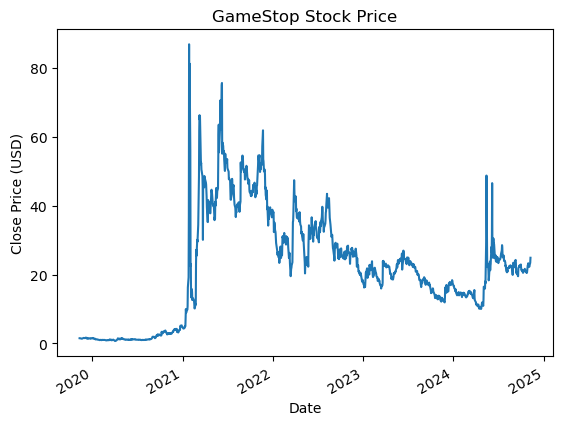

In [9]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for GameStop
ticker_symbol = 'GME'

# Create a Ticker object
gme = yf.Ticker(ticker_symbol)

# Retrieve historical stock data
# 'period' can be '1d', '5d', '1mo', '3mo', '1y', '5y', 'max'
# 'interval' can be '1m', '2m', '5m', '15m', '30m', '60m', '90m', '1h', '1d', '5d', '1wk', '1mo', '3mo'
gme_data = gme.history(period='5y', interval='1d')

# Display the first few rows of the data
print(gme_data.head())

import matplotlib.pyplot as plt

# Plot the closing prices
gme_data['Close'].plot(title='GameStop Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.show()

In [11]:
#4

In [ ]:
pip install requests beautifulsoup4 pandas

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing GameStop's revenue data
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'

# Send a GET request to the webpage
response = requests.get(url)
response.raise_for_status()  # Check for request errors

# Parse the webpage content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing the revenue data
table = soup.find('table', {'class': 'historical_data_table'})

# Extract table headers
headers = [header.text for header in table.find_all('th')]

# Extract table rows
rows = []
for row in table.find_all('tr'):
    columns = row.find_all('td')
    if columns:
        rows.append([column.text.strip() for column in columns])

# Create a DataFrame
df = pd.DataFrame(rows, columns=headers)

# Clean the data
df['Date'] = pd.to_datetime(df['Date'])
df['Revenue'] = df['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)

# Display the DataFrame
print(df.head())
df.to_csv('gamestop_revenue_data.csv', index=False)

In [17]:
#5

In [ ]:
pip install yfinance requests beautifulsoup4 pandas plotly selenium

###### from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd
import time

# Set up Selenium
service = Service('path/to/chromedriver')  # Replace with your ChromeDriver path
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run headless if you don't need to see the browser
driver = webdriver.Chrome(service=service, options=options)

# Navigate to Macrotrends page for Tesla revenue
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
driver.get(url)
time.sleep(3)  # Wait for JavaScript to load

# Find the table
table = driver.find_element(By.CLASS_NAME, 'historical_data_table')
rows = table.find_elements(By.TAG_NAME, 'tr')

# Parse table data
data = []
for row in rows[1:]:  # Skip header row
    cols = row.find_elements(By.TAG_NAME, 'td')
    if cols:
        date = cols[0].text
        revenue = cols[1].text.replace(',', '').replace('$', '')
        data.append([date, float(revenue) if revenue else None])

# Create DataFrame
revenue_df = pd.DataFrame(data, columns=["Date", "Revenue"])
revenue_df["Date"] = pd.to_datetime(revenue_df["Date"])
revenue_df.sort_values(by="Date", inplace=True)

# Clean up
driver.quit()

print(revenue_df.head())

In [28]:
#6 GameStop Stock and Revenue Dashboard

In [ ]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import plotly.graph_objects as go

# 1. Extract GameStop Stock Data using yfinance
gme = yf.Ticker("GME")
stock_data = gme.history(period="1y")  # Last 1 year of daily data

# 2. Extract GameStop Revenue Data (Web Scraping from Macrotrends)
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Locate the revenue table on Macrotrends
table = soup.find('table', {'class': 'historical_data_table'})
rows = []
for row in table.find_all('tr'):
    columns = row.find_all('td')
    if columns:
        date = columns[0].text.strip()
        revenue = columns[1].text.strip().replace(',', '').replace('$', '')
        rows.append([date, float(revenue) if revenue else None])

# Convert to DataFrame and clean
revenue_df = pd.DataFrame(rows, columns=["Date", "Revenue"])
revenue_df["Date"] = pd.to_datetime(revenue_df["Date"])
revenue_df.sort_values(by="Date", inplace=True)

# 3. Create the Dashboard using Plotly
fig = go.Figure()

# Add Stock Price Line Chart
fig.add_trace(go.Scatter(
    x=stock_data.index, y=stock_data["Close"],
    mode="lines", name="GameStop Stock Price",
    line=dict(width=2, color="blue")
))

# Add Revenue Bar Chart
fig.add_trace(go.Bar(
    x=revenue_df["Date"], y=revenue_df["Revenue"],
    name="Revenue", opacity=0.6
))

# Customize Layout
fig.update_layout(
    title="GameStop Stock Price and Revenue Over Time",
    xaxis_title="Date",
    yaxis_title="USD",
    legend=dict(x=0.02, y=0.98),
    yaxis=dict(title="Stock Price", side="left", showgrid=False),
    yaxis2=dict(title="Revenue (in millions)", side="right", overlaying="y", showgrid=True),
    xaxis=dict(rangeslider=dict(visible=True))
)

# Display the Dashboard
fig.show()

In [ ]:
#7